In [4]:
import DiadFit as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load in data from the C code to check

In [9]:
df_C=pd.read_excel('Duan_Zhang_2006_C_Code.xlsx', sheet_name='Sheet1')
df_C.head()

,P (bar),T (K),yCO2,Vm (cm3/mol),Z,fH2O (kbar),fCO2 (kbar),aH2O,aCO2
0,500,1200,1.0,225.230282,1.128707,0.000000,0.564603,0.000000,1.000000
1,500,1200,0.9,222.051424,1.112776,0.046820,0.508090,0.098150,0.899907
2,500,1200,0.8,218.772703,1.096346,0.093845,0.451459,0.196730,0.799603
3,500,1200,0.7,215.407313,1.079480,0.141110,0.394703,0.295814,0.699080
4,500,1200,0.6,211.970560,1.062258,0.188635,0.337842,0.395442,0.598370


### 1. Checking molar volumes for various pressures and XH2O

Text(0, 0.5, 'residual (Molar Volume C - DiadFit) ')

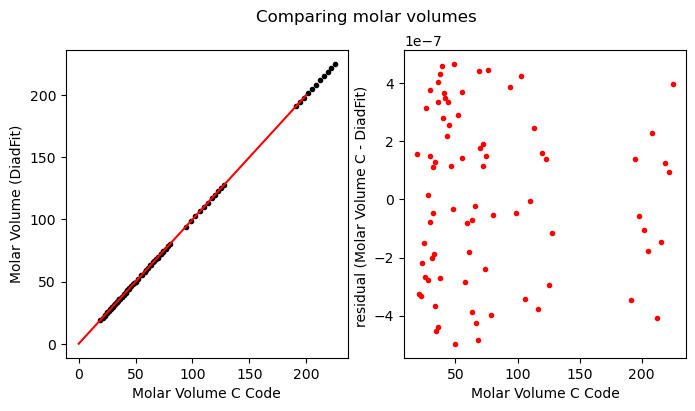

In [11]:
diadf_mol_vols=pf.calculate_molar_volume_DZ2006(P_kbar=df_C['P (bar)']/1000, T_K=df_C['T (K)'], XH2O=1-df_C['yCO2'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
plt.suptitle('Comparing molar volumes')
ax1.plot(df_C['Vm (cm3/mol)'], diadf_mol_vols, '.k')
ax1.plot([0, 200], [0, 200], '-r')
ax2.plot(df_C['Vm (cm3/mol)'], df_C['Vm (cm3/mol)']-diadf_mol_vols, '.r')
ax1.set_xlabel('Molar Volume C Code')
ax1.set_ylabel('Molar Volume (DiadFit)')
ax2.set_xlabel('Molar Volume C Code')
ax2.set_ylabel('residual (Molar Volume C - DiadFit) ')
 

In [16]:
## Load in data provided by Klugel
df_K=pd.read_excel('KerrickJacobs81_Density-Pressure-Calc.xlsx', sheet_name='0.9 CO2 + 0.1 H2O')
df_K.head()

,Density (g/cm3),P @ 1150°C (MPa),P calculated
0,0.10,30.75,28.994450
1,0.15,47.90,48.308706
2,0.20,66.90,68.201600
3,0.25,87.85,89.252094
4,0.30,110.70,112.039150


In [20]:
# Perform calcs at 10% XH2O
df_10=pf.calculate_entrapment_P_XH2O(XH2O=0.1, CO2_dens_gcm3=df_K['Density (g/cm3)'], T_K=1150+273.15, T_K_ambient=37+273.15)
df_10.head()

,P_kbar_pureCO2_SW96,P_kbar_pureCO2_SP94,P_kbar_pureCO2_DZ06,P_kbar_mixCO2_DZ06_Hloss,P_kbar_mixCO2_DZ06_no_Hloss,P Mix_Hloss/P Pure DZ06,P Mix_no_Hloss/P Pure DZ06,rho_mix_calc_Hloss,rho_mix_calc_noHloss,CO2_dens_gcm3,T_K,XH2O
0,0.287430,0.286113,0.287121,0.318277,0.317356,1.108513,1.105306,0.104545,0.104263,0.10,1423.15,0.1
1,0.447203,0.445751,0.446558,0.495825,0.493013,1.110325,1.104029,0.156818,0.156024,0.15,1423.15,0.1
2,0.620120,0.620522,0.619029,0.689673,0.683653,1.114121,1.104395,0.209091,0.207540,0.20,1423.15,0.1
3,0.808673,0.813715,0.806939,0.903613,0.892643,1.119804,1.106209,0.261364,0.258813,0.25,1423.15,0.1
4,1.015873,1.028505,1.013188,1.142082,1.123854,1.127216,1.109226,0.313636,0.309845,0.30,1423.15,0.1


Text(0, 0.5, 'Pressure (MPa)')

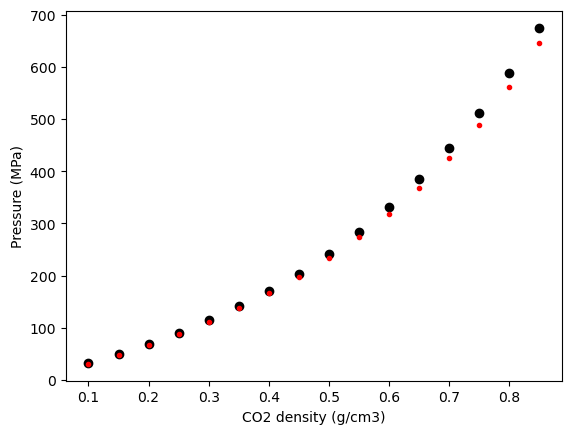

In [26]:

plt.plot(df_K['Density (g/cm3)'], df_10['P_kbar_mixCO2_DZ06_Hloss']*100, 'ok', label='DZ06 - Diadfit')
plt.plot(df_K['Density (g/cm3)'], df_K['P @ 1150°C (MPa)'], '.r', label='KJ81 - Klugel')
plt.xlabel('CO2 density (g/cm3)')
plt.ylabel('Pressure (MPa)')